# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode


# additional imports if necessary

### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error
4. Log Loss

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

In [3]:
# your code here
def gini_index (lables):
    n = lables.sum()
    p_sum = 0
    for key in lables.keys():
        p_sum = p_sum  +  (lables[key] / n ) * (lables[key] / n ) 
    impurity = 1 - p_sum
    return impurity
def entropy(lables):
    elements,counts = np.unique(lables,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
def MisclassificationError(lables):
  prop=np.bincount(lables)/len(lables)
  error=1-max([p for p in prop if p>0])
  return error

### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [5]:
data = pd.read_csv('bankAuth.txt')
labels=np.array(data.iloc[:,4:])
features=np.array(data.iloc[:,:4])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
x_train=np.array(x_train)
y_train=np.array(y_train).reshape(-1)
x_test=np.array(x_test)
y_test=np.array(y_test).reshape(-1)


In [6]:
min_split=2
max_depth=3
no_of_feature=x_train.shape[1]
Root=None

In [7]:
# your code here
from collections import Counter
class Node:
  def __init__(self,feature=None,thresold=None,left=None,right=None,*,value=None):
    self.feature=feature
    self.left=left
    self.right=right
    self.thresold=thresold
    self.value=value
  def isLeaf(self):
    return self.value != None

def get_len(l):
  return len(l)
def make_tree(x_train,y_train,depth=0):
  no_lables=len(np.unique(y_train))

  if( depth >= max_depth or no_lables == 1 or x_train.shape[0]<min_split):
    val=mode(y_train)
    return Node(value=val)
  feat_index = np.random.choice(x_train.shape[1],no_of_feature,replace=False) 
  best_feature , best_thresold=best_split(x_train, y_train ,feat_index)

  left_index=np.argwhere(x_train[:,best_feature] <= best_thresold).flatten()
  right_index=np.argwhere(x_train[:,best_feature] > best_thresold).flatten()
  left=make_tree(x_train[left_index,:],y_train[left_index],depth+1)
  right=make_tree(x_train[right_index,:],y_train[right_index],depth+1)
  return Node(feature=best_feature , thresold=best_thresold,left=left,right=right)


def fit(x_train,y_train):
  global Root
  Root=make_tree(x_train,y_train)

def best_split(x_train, y ,feat_indexes):
  b_gain=-1
  split_index,split_thresold=None,None
  for idx in feat_indexes:
    x_column=x_train[:,idx]
    thresolds=np.unique(x_column)
    for thresold in thresolds:
      ig=Info_gain_entropy(y,x_column,thresold)
      if ig > b_gain:
        b_gain=ig
        split_index=idx
        split_thresold=thresold
  return  split_index,split_thresold     

  #calculate information gain....
def Info_gain_entropy(y,x_column,thresold):
  parent_entropy=entropy(y)
  left_index=np.argwhere(x_column <= thresold).flatten()
  right_index=np.argwhere(x_column > thresold).flatten()
  if(get_len(left_index) == 0 or get_len(right_index) == 0):
    return 0
  child_entropy=(get_len(left_index)/get_len(y))*entropy(y[left_index])+(get_len(right_index)/get_len(y))*entropy(y[right_index])
  Ig=parent_entropy-child_entropy
  return Ig


def traverse_tree(x,node):
  if node.isLeaf():
    return node.value
  if(x[node.feature] > node.thresold):
    return traverse_tree(x,node.right)
  else:
    return traverse_tree(x,node.left)

def predict(x_test):
   arr=np.array([traverse_tree(x,Root) for x in x_test])
   return arr

In [8]:
fit(x_train,y_train)
Y_pred=predict(x_test)
accuracy = np.sum(y_test == Y_pred)/len(y_test)
accuracy

0.9454545454545454

### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

Whenever we encountered a classification problem where we have to query different features, we use decision Tree classifier.

When we encounter a regression problem where we have to predict continuous values ,we can use decision Tree regression.

here we will use decision Tree classifier becouse we have to predict one of the two classes zero or one.

We can use regressor if we have to predict the accuracy of eah data point where we have to find how close the data is to being to either classes.



In [9]:
# your code here
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils

from prettytable import PrettyTable
data = pd.read_csv('bankAuth.txt')
lab_enc = preprocessing.LabelEncoder()
Y=np.array(data.iloc[:,4:])
X=np.array(data.iloc[:,:4])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
maxDepth=[1,2,3,4,5,6,7,8,9,10]
min_samples_split=[2,3,4]
myTable = PrettyTable(["Depth", "criterion","min_samples_split","Accuracy"])
for depth in maxDepth:
  for msp in min_samples_split:
    clf=DecisionTreeClassifier( 
        criterion='entropy', 
        splitter='best', 
        max_depth=depth, 
        min_samples_split=msp,
    )
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_test)
    accuracy = np.sum(y_test == Y_pred)
    ans = 0
    for i in range(len(Y_pred)):
      if(y_test[i] == Y_pred[i]):
        ans+=1
    accuracy=ans/len(Y_pred) 
    myTable.add_row([depth, "entropy",msp,accuracy])
    clf=DecisionTreeClassifier( 
        criterion='gini', 
        splitter='best', 
        max_depth=depth, 
        min_samples_split=msp,
    )
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_test)
    accuracy = np.sum(y_test == Y_pred)
    ans = 0
    for i in range(len(Y_pred)):
      if(y_test[i] == Y_pred[i]):
        ans+=1
    accuracy=ans/len(Y_pred)   
    myTable.add_row([depth, "gini",msp,accuracy])
print(myTable)

+-------+-----------+-------------------+--------------------+
| Depth | criterion | min_samples_split |      Accuracy      |
+-------+-----------+-------------------+--------------------+
|   1   |  entropy  |         2         | 0.8495145631067961 |
|   1   |    gini   |         2         | 0.8567961165048543 |
|   1   |  entropy  |         3         | 0.8495145631067961 |
|   1   |    gini   |         3         | 0.8567961165048543 |
|   1   |  entropy  |         4         | 0.8495145631067961 |
|   1   |    gini   |         4         | 0.8567961165048543 |
|   2   |  entropy  |         2         | 0.8907766990291263 |
|   2   |    gini   |         2         | 0.9320388349514563 |
|   2   |  entropy  |         3         | 0.8907766990291263 |
|   2   |    gini   |         3         | 0.9320388349514563 |
|   2   |  entropy  |         4         | 0.8907766990291263 |
|   2   |    gini   |         4         | 0.9320388349514563 |
|   3   |  entropy  |         2         | 0.95631067961

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [10]:
data = pd.read_csv('bankAuth.txt')

In [11]:
# your code here
# your code here
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils
clf=DecisionTreeClassifier( 
    criterion='entropy', 
    splitter='best', 
    max_depth=3, 
    min_samples_split=2,
)
clf.fit(x_train, y_train)
Y_pred = clf.predict(x_test)
accuracy = np.sum(y_test == Y_pred)
ans = 0
for i in range(len(Y_pred)):
  if(y_test[i] == Y_pred[i]):
    ans+=1

accuracy=ans/len(Y_pred)
accuracy

0.9563106796116505

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [12]:
# your code here
from sklearn import tree


def plotTree(clf):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    a = tree.plot_tree(clf, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None

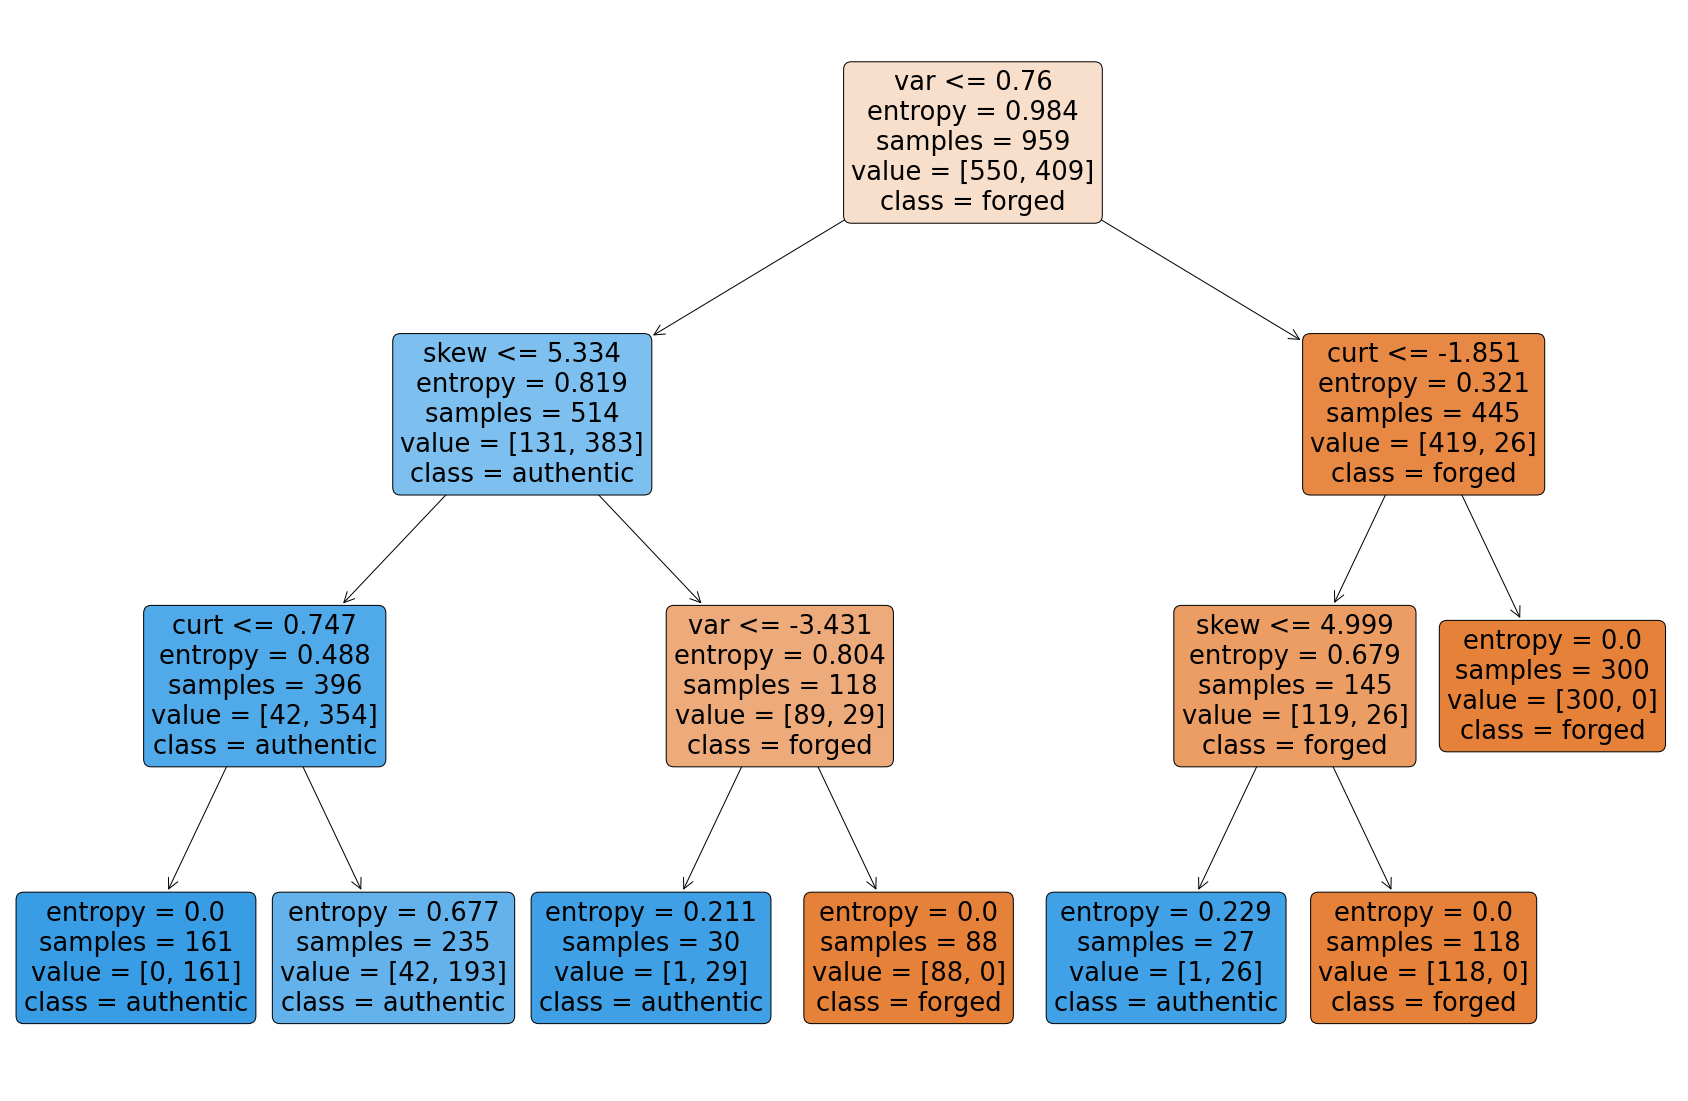

In [13]:
plotTree(clf)

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

Form the above table we can see for different values of max_depth and minimum sample_split we are getting better accuracy for entropy rather than gini in criteria

In [14]:
# your code here
print(myTable)

+-------+-----------+-------------------+--------------------+
| Depth | criterion | min_samples_split |      Accuracy      |
+-------+-----------+-------------------+--------------------+
|   1   |  entropy  |         2         | 0.8495145631067961 |
|   1   |    gini   |         2         | 0.8567961165048543 |
|   1   |  entropy  |         3         | 0.8495145631067961 |
|   1   |    gini   |         3         | 0.8567961165048543 |
|   1   |  entropy  |         4         | 0.8495145631067961 |
|   1   |    gini   |         4         | 0.8567961165048543 |
|   2   |  entropy  |         2         | 0.8907766990291263 |
|   2   |    gini   |         2         | 0.9320388349514563 |
|   2   |  entropy  |         3         | 0.8907766990291263 |
|   2   |    gini   |         3         | 0.9320388349514563 |
|   2   |  entropy  |         4         | 0.8907766990291263 |
|   2   |    gini   |         4         | 0.9320388349514563 |
|   3   |  entropy  |         2         | 0.95631067961